# **Analysis of NBA Rookie Performances**
Author: Aidan Vu

# **Introduction**

The NBA draft can be what makes or breaks an NBA team. Teams often trade current players for more opportunities to be able to draft incoming NBA rookies. For some teams, it ends well with drafting a future superstar who can become the future face of the team. However, the same can't be said for all players. Some players, despite seeming very promising before being drafted, can end up as a bust who doesn't provide much for the team.

The purpose of this study is to evaluate the performance of a player in their rookie year to predict how successful they will be in their NBA career. In order to determine success, we will look at the Naismith Hall of Fame, which includes only players of the highest caliber. In this tutorial, we will analyze which player statistics contribute the most to success, and by the end, we will be able to roughly predict whether or not a player will become a Hall of Famer based on their rookie season statistics.

# **Data Curation**

Before we can continue with the tutorial, we must first import all necessary python libraries that we will be using throughout this tutorial.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

Now that we've imported all necessary libraries, we can continue. Next, we will need to read the datasets that we will be using which have the rookie season statistics from a wide range of players over a large period of time. These datasets are titled, "NBA Rookies by Year" and "NBA Rookies by Year_Hall of Fame Class" and are both by Gabe Salzer, and can be found on Kaggle here: https://www.kaggle.com/datasets/thedevastator/nba-rookies-performance-statistics-and-minutes-p.

We will then print out the datasets so we can see all of the data.

In [137]:
rookies_df = pd.read_csv('NBA Rookies by Year.csv')
hof_df = pd.read_csv('NBA Rookies by Year_Hall of Fame Class.csv')

print(rookies_df)
print(hof_df)

      index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0         0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1         1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2         2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3         3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4         4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   
...     ...              ...           ...   ...   ...   ...  ...   ...   ...   
2009   2009              NaN           NaN   NaN   NaN   NaN  NaN   NaN   NaN   
2010   2010              NaN           NaN   NaN   NaN   NaN  NaN   NaN   NaN   
2011   2011              NaN           NaN   NaN   NaN   NaN  NaN   NaN   NaN   
2012   2012              NaN           NaN   NaN   NaN   NaN  NaN   NaN   NaN   
2013   2013              NaN           NaN   NaN   NaN   NaN  NaN   NaN   NaN   

      3P Made  ...  FTA   F

After reading and printing the two datasets, we can see that there are many null entries which are extranneous, which we don't need. So, we will clean the dataset by removing all unnecessary entries, which have values NaN.

In [138]:
rookies_df.dropna(inplace=True)
hof_df.dropna(inplace=True)
print(rookies_df)
print(hof_df)

      index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0         0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1         1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2         2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3         3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4         4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   
...     ...              ...           ...   ...   ...   ...  ...   ...   ...   
1533   1533       Billy Reid        1980.0  59.0  10.1   3.2  1.4   3.1  45.4   
1534   1534   Jerry Sichting        1980.0  47.0   9.6   2.0  0.7   2.0  35.8   
1535   1535    Reggie Carter        1980.0  60.0   8.9   2.8  1.0   3.0  33.0   
1536   1536      Mike Harper        1980.0  55.0   8.4   2.7  1.0   2.5  41.2   
1537   1537       Mike Niles        1980.0  44.0   5.3   2.6  1.1   3.1  34.8   

      3P Made  ...  FTA   F

Now that we can see we've removed all NaN entries, there's one more step to curating the data before we can draw conclusions. Instead of having two different datasets, it would be easier to only keep one which has a new column called "HoF" and has the value 0 if the player is not in the Hall of Fame, and has the value 1 if the player is.

In [139]:
rookies_df['HoF'] = rookies_df['Name'].isin(hof_df['Name']).astype(int)
print(rookies_df)

      index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0         0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1         1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2         2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3         3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4         4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   
...     ...              ...           ...   ...   ...   ...  ...   ...   ...   
1533   1533       Billy Reid        1980.0  59.0  10.1   3.2  1.4   3.1  45.4   
1534   1534   Jerry Sichting        1980.0  47.0   9.6   2.0  0.7   2.0  35.8   
1535   1535    Reggie Carter        1980.0  60.0   8.9   2.8  1.0   3.0  33.0   
1536   1536      Mike Harper        1980.0  55.0   8.4   2.7  1.0   2.5  41.2   
1537   1537       Mike Niles        1980.0  44.0   5.3   2.6  1.1   3.1  34.8   

      3P Made  ...   FT% OR

# **Exploratory Data Analysis**

We will now examine the cleaned data to observe any statistical trends in order to draw conclusions.

Conclusion 1: Is there a significant difference in the Average Rookie's Efficiency Rating over the years?

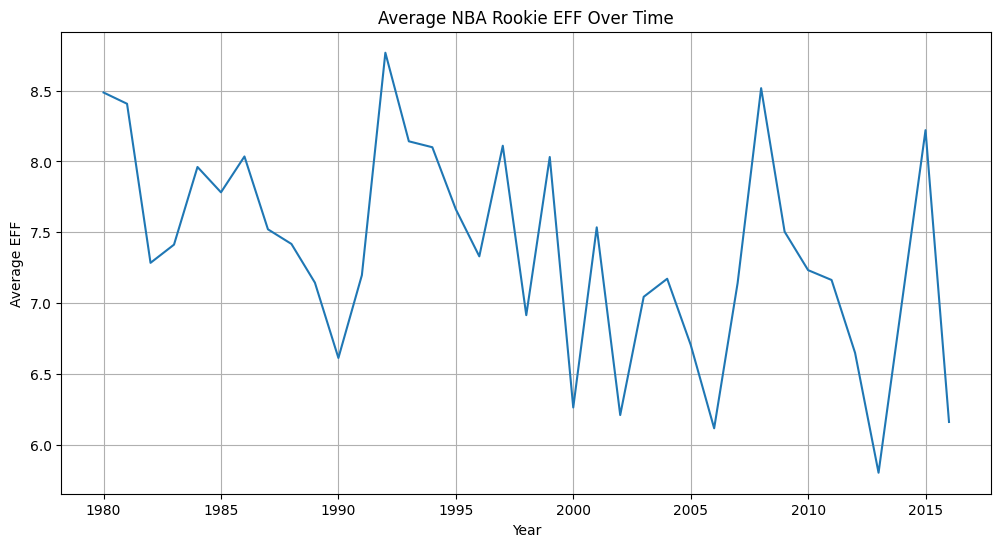

In [140]:
average_eff_by_year = rookies_df.groupby('Year Drafted')['EFF'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_eff_by_year.index, average_eff_by_year.values)

plt.title('Average NBA Rookie EFF Over Time')
plt.xlabel('Year')
plt.ylabel('Average EFF')
plt.grid()
plt.show()

Hypothesis Test: ANOVA

Null Hypothesis: There is no significant difference in average player efficiency rating over the years

Alternative Hypothesis: There is a significant difference in average player efficiency rating over the years

Assume α = 0.05

In [141]:
years = rookies_df['Year Drafted'].unique()
grouped_data = [rookies_df[rookies_df['Year Drafted'] == year]['EFF'] for year in years]

f_stat, p_value = f_oneway(*grouped_data)

print(f"P-value for ANOVA test: {p_value}")

P-value for ANOVA test: 0.3020156684862854


Since we got a P-value of 0.302 and 0.302 > 0.05, we fail to reject the null hypothesis and therefore we conclude that there is no significant difference in the Average Rookie Player Efficiency Rating over the years.

Conclusion 2: Is there a significant difference between the efficiency of Hall of Famer's Rookie seasons compared to non Hall of Famers?

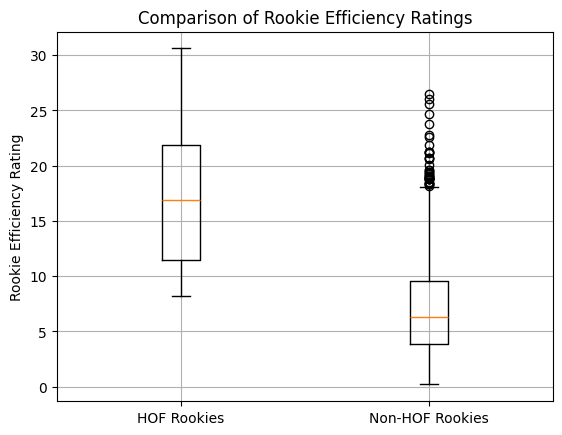

In [142]:
non_hof_df = rookies_df[~rookies_df['Name'].isin(hof_df['Name'])]

hof_efficiency = hof_df['EFF']
non_hof_efficiency = non_hof_df['EFF']

plt.boxplot([hof_efficiency, non_hof_efficiency], tick_labels=["HOF Rookies", "Non-HOF Rookies"])
plt.ylabel("Rookie Efficiency Rating")
plt.title("Comparison of Rookie Efficiency Ratings")
plt.grid(True)

plt.show()

Hypothesis Test: T-test

Null Hypothesis: There is no significant difference in the efficiency of Hall of Famer's rookie seasons compared to non Hall of Famers

Alternative Hypothesis: There is a significant difference in the efficiency of Hall of Famer's rookie seasons compared to non Hall of Famers

Assume α = 0.05

In [143]:
result = ttest_ind(hof_efficiency, non_hof_efficiency)

print(f"P-value: {result.pvalue}")

P-value: 2.1125008703244385e-30


Since we got a P-value of 2.11e-30 and 2.11e-30 < 0.05, we reject the null hypothesis and therefore we conclude that there is a significant difference in the efficiency of Hall of Famer's rookie seasons compared to non Hall of Famers. Clearly, from the boxplot above we can see that overall the Hall of Famers have higher efficiency ratings in their rookie seasons

Conclusion 3: Is there a correlation between minutes played and points per game?

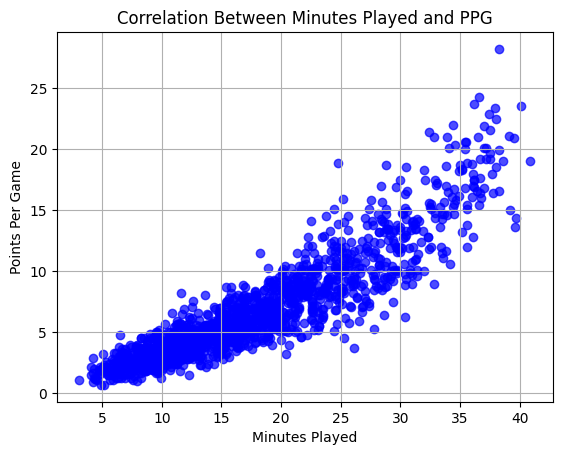

In [144]:
minutes_played = rookies_df['MIN']
ppg = rookies_df['PTS']

plt.scatter(minutes_played, ppg, color='b', alpha=0.7, label="Rookie Data")
plt.xlabel("Minutes Played")
plt.ylabel("Points Per Game")
plt.title("Correlation Between Minutes Played and PPG")
plt.grid(True)

Hypothesis Test: Pearson Correlation Test

Null Hypothesis: There is no significant correlation between minutes played and points per game

Alternative Hypothesis: There is a significant correlation between minutes played and points per game

In [145]:
correlation, p_value = pearsonr(minutes_played, ppg)

print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.9068408398029749
P-value: 0.0


Since the P-Value is less than 0.05, we reject the null hypothesis, and conclude that there is a significant correlation between minutes played and points per game. The correlation coefficient we got is 0.9, indicating a strong correlation between minutes played and points per game

# **Primary Analysis**

From our exploratory data analysis, we can can conclude that the efficiency of rookies is not significantly changing over time, the overall Hall of Fame efficiency is greater than the non Hall of Fame efficiency, and more minutes played is strongly correlated to more points per game.

Now, we will address the original goal set in the introduction, which was to analyze which statistics are most important in terms of Hall of Fame success, and be able to use these statistics to predict whether or not a player is likely to become a Hall of Famer based on their rookie season statistics.

First we will prepare the data to be worked with. One noteable feature is that the data is stratified, which we must do since our data is imbalanced. The amount of statistics from hall of fame players we have is much lower than the number of entries from non hall of fame players.

In [146]:
features = ['EFF', 'PTS', 'REB', 'AST', 'MIN', 'FG%']
X = rookies_df[features]
y = rookies_df['HoF']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Now that we've prepared the data, we will perform logistic regression. We are choosing logistic regression here since in this case we are looking at only two outcomes, which are either Hall of Fame, or not Hall of Fame. Also, logistic regression will give weights, which signify the importance of each statistic when it comes to determining Hall of Fame status.

In [148]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       454
           1       0.11      1.00      0.20         8

    accuracy                           0.86       462
   macro avg       0.55      0.93      0.56       462
weighted avg       0.98      0.86      0.91       462



We can see above that the model does a great job of identifying when a player won't make the hall of fame, being correct 100% of the time and identifying 85% of all true on Hall of Fame players. However, the model is not as good when identifying future Hall of Fame players, where 11% of players predicted actually become Hall of Famers. But, it catches 100% of Hall of Fame players. Seemingly, the only concern is with the precision of identifying future Hall of Fame players, but this may actually not be too concerning, and will be addressed in the conclusion section.

In [149]:
print("Feature weights:")
for feat, coef in zip(features, model.coef_[0]):
    print(f"{feat}: {coef:.3f}")

Feature weights:
EFF: 0.501
PTS: 0.192
REB: -0.358
AST: 0.482
MIN: -0.223
FG%: 0.194


Here we can see the weights of the statistics that was generated by our model. These weights represent how important each statistic is in determining whether or not a player will be in the Hall of Fame.

# **Visualization**

Now that we've completed our primary analysis, we will now visualize the results.

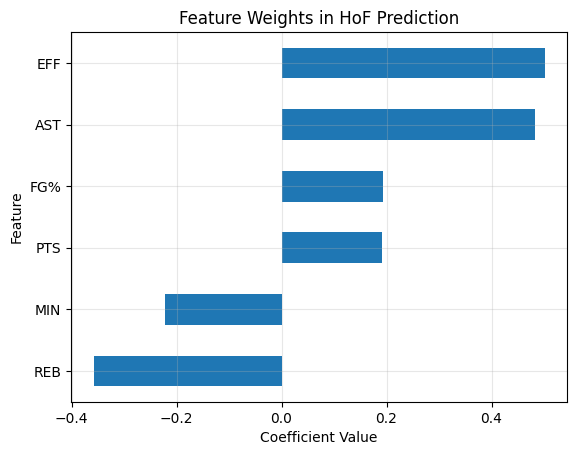

In [150]:
pd.Series(model.coef_[0], index=features).sort_values().plot(kind='barh')
plt.title('Feature Weights in HoF Prediction');
plt.xlabel('Coefficient Value');
plt.ylabel('Feature');
plt.grid(True, alpha=0.3)
plt.show()

From the above graph, we can see the weights of each statistic. We can see that efficiency has the highest weight, meaning it is the most important statistic when it comes to predicting Hall of Famers. Not too far behind are more statistics like assists, field goal percentage, and pts. This means that these statistics are the most important ones in predicting Hall of Famers.

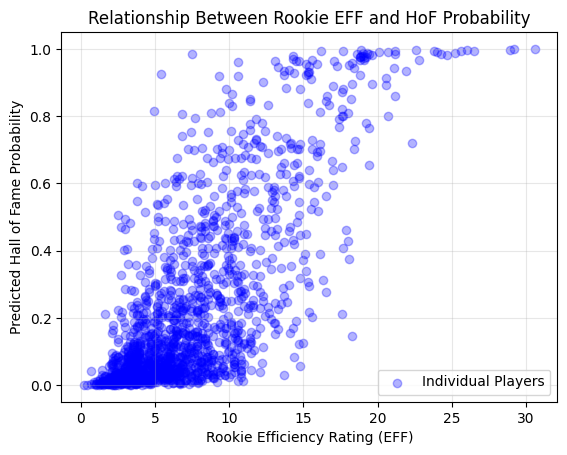

In [151]:
hof_probs = model.predict_proba(X)[:, 1]
plt.scatter(rookies_df['EFF'], hof_probs,
            alpha=0.3, color='blue',
            label='Individual Players')
plt.xlabel('Rookie Efficiency Rating (EFF)')
plt.ylabel('Predicted Hall of Fame Probability')
plt.title('Relationship Between Rookie EFF and HoF Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In this graph, we can see the relation between player efficiency, which was the highest weighted statistic, and our model's predicted Hall of Fame probability. As we can see, there is definitely an upwards trend where as efficiency rating gets higher so does predicted Hall of Fame probability. Some other interesting things from our plot is that we can see the large majority of players are at the bottom left of the graph, which we can tell due to how concentrated that area is. This shows how Hall of Fame players are very rare, and the large majority of NBA players will not become Hall of Famers.

# **Insights and Conclusions**

To conclude, we've addressed our original questions from the introduction. We've determined that the most important statistic for predicting Hall of Fame status is player efficiency, followed by assists, field goal percentage, and points. Using these statistics with their corresponding weights, we've made a model which can be used to predict Hall of Fame given rookie season statistics. For example, we can make it into a function to input rookie season statistics and provide a prediction like below:

In [152]:
def hof_probability(eff, pts, reb, ast, min_played, fg_pct):
    stats = [[eff, pts, reb, ast, min_played, fg_pct]]
    return model.predict_proba(stats)[0][1] * 100

We can see this function at work with an example of Michael Jordan's rookie year statistics.

In [153]:
# Example: Michael Jordan's rookie year
print(f"Jordan's HoF Probability: {hof_probability(29.2, 28.2, 6.5, 5.9, 38.3, 51.5):.1f}%")

Jordan's HoF Probability: 100.0%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We get a 100% probability of Michael Jordan being in the Hall of Fame. Obviously, we already know that Michael Jordan, arguably the greatest basketball player of all time, made the Hall of Fame. While our model does give a fairly good prediction for Hall of Fame, it is also important that we address some of the limitations of our model.

First of all, the model is limited because of the low number of Hall of Fame players that we have the data for. We only have around 23 entries with data for Hall of Fame players. Additionally, along the same lines, another limitation is that there are players who are currently playing the NBA who are basically guaranteed to be in the Hall of Fame. For example, Lebron James, widely debated to be the greatest basketball player of all time with Michael Jordan, is still currently playing in the NBA. Since he's still currently playing, he is not yet in the Hall of Fame, although he is essentially guaranteed to be. So, his data is being considered as a non Hall of Famer, even though that will almost surely change in the near future. It is because of these two facts that we can conclude that our model will continue to get more and more accurate as time passes.